# <font color='blue'>Problema de Machine Learning de Classificação: Previsão de Churn para uma Empresa de Telecomunicações</font>

# 1 - Definindo o problema de negócio

### Uma empresa de telecomunicações está enfrentando um problema de alta taxa de churn entre seus clientes. Eles desejam desenvolver um modelo de previsão de churn que os ajude a identificar os clientes com maior probabilidade de cancelar seus serviços. Isso permitirá que eles adotem medidas proativas para reter esses clientes e reduzir a perda de receita.

# 2 - Decisões

### O problema de negócio já informa que é requerido um modelo de Machine Learning. No dataset, temos a coluna “Churn” que é a variável que queremos prever. Desta forma, iremos utilizar aprendizagem supervisionada.

# 3 - Versão python e import dos pacotes utilizados

In [228]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [229]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark
#!pip install category_encoders

In [230]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [231]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Danilo Temerloglou de Abreu" --iversions

Author: Danilo Temerloglou de Abreu

numpy     : 1.23.5
sklearn   : 1.2.1
seaborn   : 0.12.2
matplotlib: 3.7.1
pandas    : 1.3.4



# 4 - Dicionário de dados

In [232]:
#customerID - Identificação única de cada cliente. 
#gender - Gênero do cliente (por exemplo, masculino ou feminino).
#SeniorCitizen -Indica se o cliente é um cidadão idoso (1 para sim, 0 para não). 
#Partner - Indica se o cliente tem um parceiro (por exemplo, sim ou não). 
#Dependents - Indica se o cliente tem dependentes (por exemplo, sim ou não).    
#tenure - Tempo em meses que o cliente permaneceu como cliente da empresa. 
#PhoneService - Indica se o cliente possui serviço de telefone (por exemplo, sim ou não) 
#MultipleLines - Indica se o cliente tem várias linhas de serviço (por exemplo, sim, não ou sem serviço de telefone).
#InternetService - Tipo de serviço de internet do cliente (por exemplo, DSL, fibra óptica ou não).
#OnlineSecurity - Indica se o cliente possui serviço de segurança online (por exemplo, sim, não ou sem serviço de internet).
#OnlineBackup - Indica se o cliente possui serviço de backup online (por exemplo, sim, não ou sem serviço de internet).
#DeviceProtection - Indica se o cliente possui serviço de proteção de dispositivo (por exemplo, sim, não ou sem serviço de internet)
#TechSupport - Indica se o cliente possui suporte técnico (por exemplo, sim, não ou sem serviço de internet).
#StreamingTV - Indica se o cliente possui serviço de streaming de TV (por exemplo, sim, não ou sem serviço de internet).
#StreamingMovies - Indica se o cliente possui serviço de streaming de filmes (por exemplo, sim, não ou sem serviço de internet)
#Contract - Tipo de contrato do cliente (por exemplo, mensal, anual ou bianual).
#PaperlessBilling - Indica se o cliente optou por faturamento sem papel (por exemplo, sim ou não).
#PaymentMethod - Método de pagamento do cliente (por exemplo, cheque eletrônico, cheque enviado pelo correio, transferência bancária (automática) ou cartão de crédito (automático)).
#MonthlyCharges - Valor cobrado do cliente mensalmente.
#TotalCharges - Valor total cobrado do cliente durante todo o período.
#Churn - Indica se o cliente cancelou o serviço (por exemplo, sim ou não) período de tempo

# 5 - Carregando o Conjunto de dados

In [233]:
# Carrega o dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# 6 - EDA Análise Exploratória de Dados

In [234]:
# Shape
df.shape

(7043, 21)

In [235]:
#nomes das colunas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [236]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [237]:
# Amostra
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3207,3694-GLTJM,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.65,92.05,No
2713,5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
188,0956-SYCWG,Female,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.65,244.8,No
2793,3904-UKFRE,Male,0,No,No,4,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.10,336.15,No
5070,4628-WQCQQ,Male,0,No,Yes,35,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Electronic check,85.15,3030.6,Yes


In [238]:
print (df['customerID'].unique())


['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


In [239]:
#arrumando os tipos de variáveis
df['gender'] = df['gender'].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df['Partner'] = df['Partner'].astype('category')
df['Dependents'] = df['Dependents'].astype('category')
df['PhoneService'] = df['PhoneService'].astype('category')
df['MultipleLines'] = df['MultipleLines'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineBackup'] = df['OnlineBackup'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].astype('category')
df['TechSupport'] = df['TechSupport'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['StreamingMovies'] = df['StreamingMovies'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')
#df['TotalCharges'] = df['TotalCharges'].astype('float')
df['Churn'] = df['Churn'].astype('category')

In [240]:
# Convertendo a coluna 'TotalCharges' para float, definindo valores inválidos como 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [241]:
print(df.dtypes)

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


### Exploração das variáveis numéricas

In [242]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


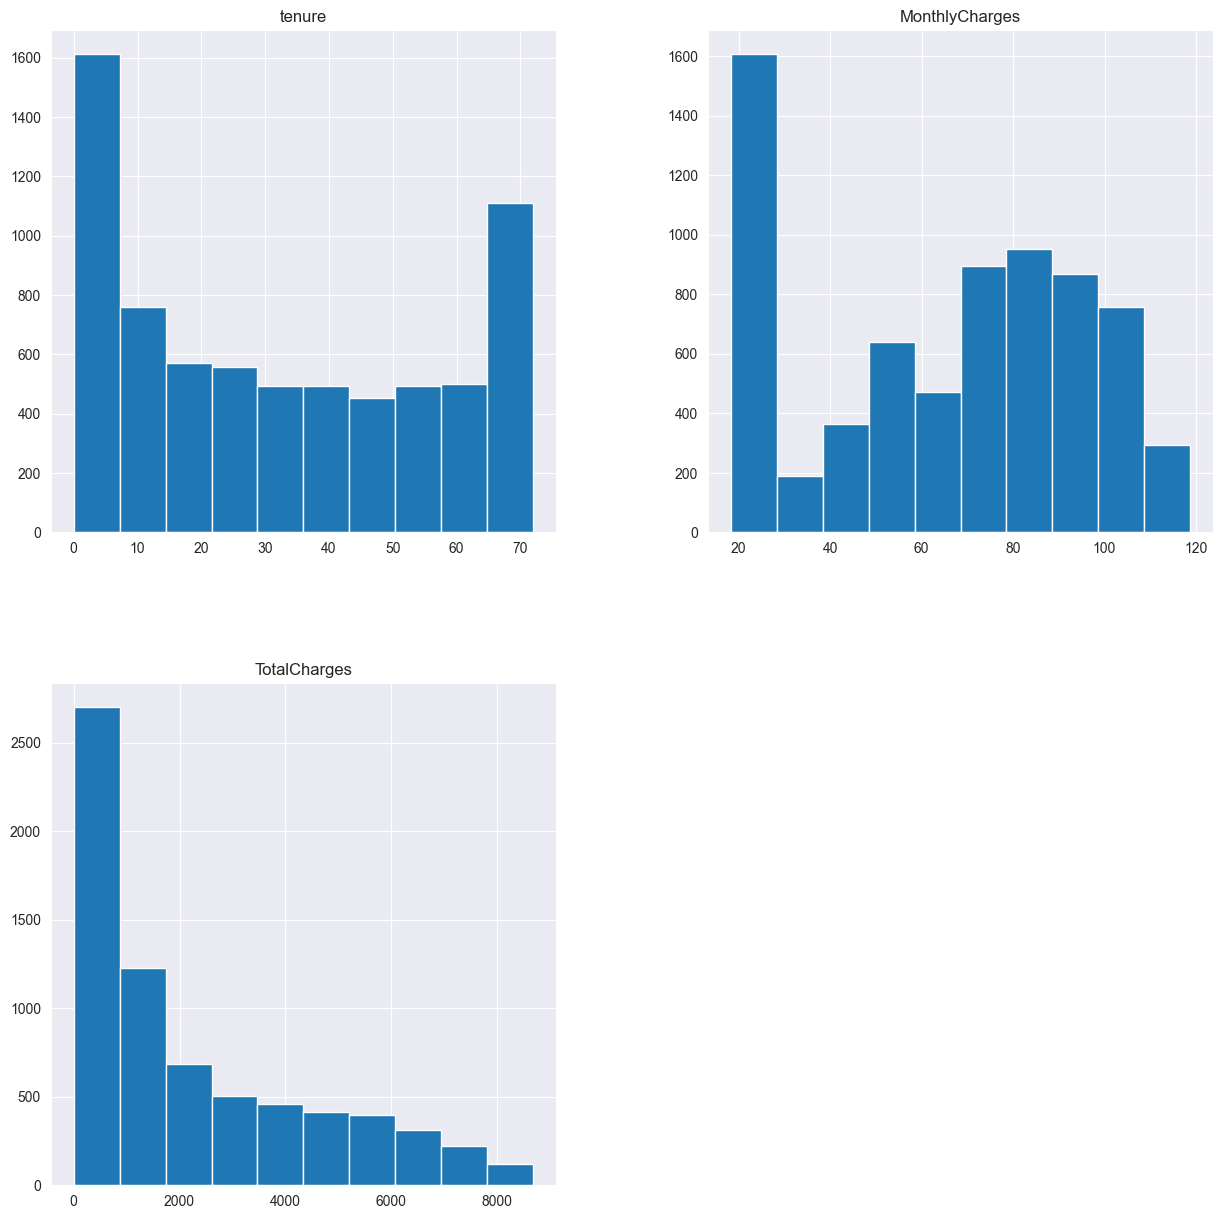

In [243]:
# Plot 
df.hist(figsize = (15,15), bins = 10) 
plt.show()

In [244]:
# Insighs:
# Tempo em meses que o cliente permaneceu como cliente da empresa - muitos são clientes novos (menos de 1 ano) e muitos antigos (mais de 5 anos)
# Maioria paga pouco mensalmente
# Maioria pagou pouco no total até o momento

In [245]:
# Correlação (tabela)
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


In [246]:
# A variável Outcome (que é a que queremos prever) tem melhor correlação com a variável 'TotalCharges'.
# As variáveis preditoras MonthlyCharges e TotalChargess tem alta correlação entre si o que não é bom para o modelo de ML.

In [247]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [248]:
# A variável Churn (que é a que queremos prever) está desbalanceada. Isso é ruim para o modelo de ML e devemos ajustar 
# antes de criar os modelos.
# A maior parte dos dados mostra clientes que continuam na empresa.

### Verificando a relação entre atributos

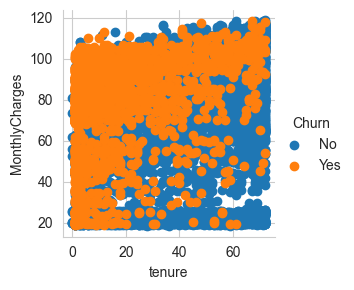

In [249]:
# Define o estilo do background
sns.set_style('whitegrid')  

# Facetgrid
sns.FacetGrid(df, hue = 'Churn').map(plt.scatter, 'tenure', 'MonthlyCharges').add_legend()

In [250]:
# Temos mais churns com clientes que estão a pouco tempo ou que estão a mais tempo pagando mais caro.


C:\Users\Chilov\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


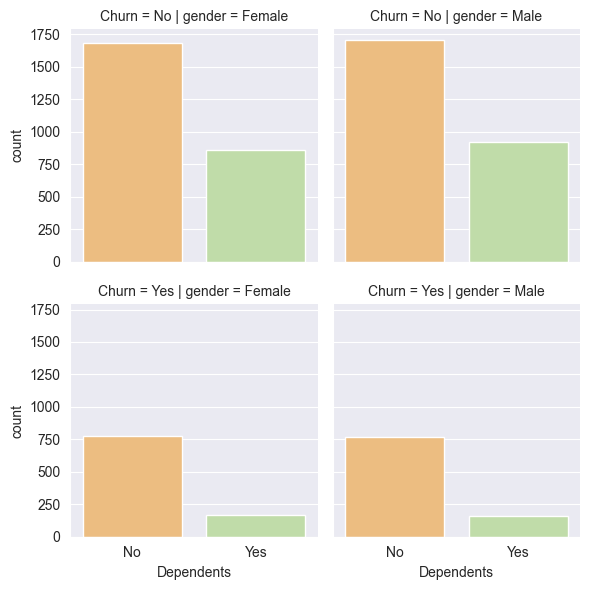

In [251]:
# Define o estilo do background
sns.set_style('darkgrid') 

# Facetgrid
#sns.FacetGrid(df, hue = 'Churn').map(plt.scatter, 'gender', 'Dependents').add_legend()

# Definindo a paleta de cores que deseja usar
palette = "Spectral"  # Você pode escolher outra paleta se preferir

# Criando o FacetGrid
g = sns.FacetGrid(df, row='Churn', col='gender', palette=palette)

# Mapeando o countplot e especificando a paleta de cores
g.map(sns.countplot, 'Dependents', palette=palette)

# Adicionando título ao FacetGrid
#g.fig.suptitle('Distribuição de Dependentes por Gênero e Churn')

# Exibindo o gráfico
plt.show()

In [252]:
# sempre há mais famílias sem dependentes. A proporção de churn não é alterada pelo gênero ou dependentes.

## 7 - Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [253]:
df.shape

(7043, 21)

In [254]:
# Verificando valores ausentes
numero_ausentes = df.isnull().sum()
print('A quantidade de valores ausentes em cada coluna é:\n', numero_ausentes)

A quantidade de valores ausentes em cada coluna é:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [255]:
# não há valores ausentes

In [256]:
# Verifica registros duplicados (remove uma das duplicatas)
numero_duplicados = df.duplicated().sum()
print('A quantidade de valores duplicados é: ', numero_duplicados)

A quantidade de valores duplicados é:  0


In [257]:
# não há valores duplicados

### Tratamento de outliers

<Axes: >

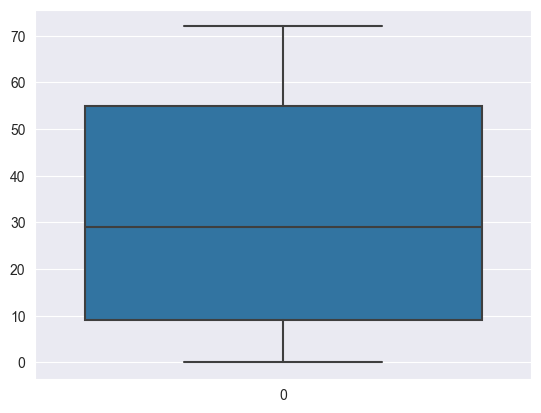

In [258]:
# Boxplot
sns.boxplot(df.tenure)

<Axes: >

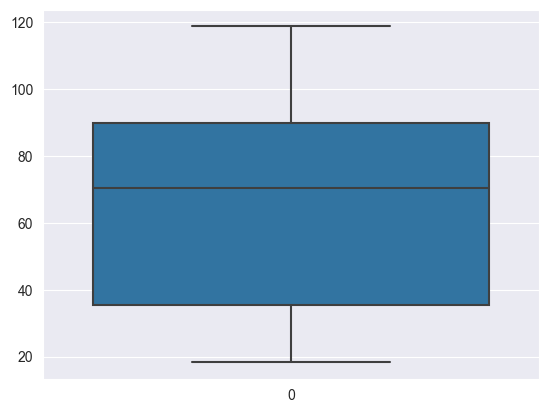

In [259]:
# Boxplot
sns.boxplot(df.MonthlyCharges)

<Axes: >

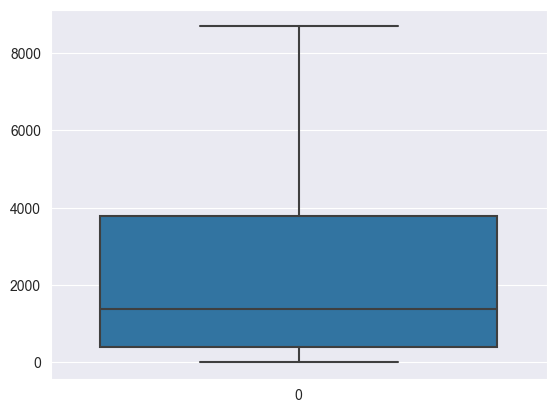

In [260]:
# Boxplot
sns.boxplot(df.TotalCharges )

In [261]:
#outliers - variável tenure
# Calcular os quartis
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['tenure'] < limite_inferior]
outliers_superiores = df[df['tenure'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)

Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 0


In [262]:
#outliers - variável MonthlyCharges
# Calcular os quartis
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['MonthlyCharges'] < limite_inferior]
outliers_superiores = df[df['MonthlyCharges'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)

Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 0


In [263]:
#outliers - variável TotalCharges
# Calcular os quartis
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)

# Calcular o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_inferiores = df[df['TotalCharges'] < limite_inferior]
outliers_superiores = df[df['TotalCharges'] > limite_superior]

# Contar a quantidade de outliers inferiores e superiores
quantidade_outliers_inferiores = len(outliers_inferiores)
quantidade_outliers_superiores = len(outliers_superiores)

print("Quantidade de outliers inferiores:", quantidade_outliers_inferiores)
print("Quantidade de outliers superiores:", quantidade_outliers_superiores)

Quantidade de outliers inferiores: 0
Quantidade de outliers superiores: 0


In [264]:
# não há outliers

### Balanceando os dados de saída

In [265]:
# Vamos fazer o Under sampling para este balanceamento

# Separar features e target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Criar o objeto RandomUnderSampler para balancear as classes
rus = RandomUnderSampler(random_state=42)

# Aplicar o undersampling aos dados
X_resampled, y_resampled = rus.fit_resample(X, y)

# Converter os dados balanceados de volta para DataFrame
df_balanceado = pd.DataFrame(X_resampled, columns=X.columns)
df_balanceado['Churn'] = y_resampled

# Visualizar o DataFrame balanceado
#print(df_balanceado)

# novo shape após balanceamento
df_balanceado.shape


(3738, 21)

In [266]:
# Quantidade de respostas com e sem diabetes balanceada
df_balanceado['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

### Analisando variáveis categóricas

In [267]:
#verificando as colunas categóricas
categorical_columns = df.select_dtypes(include=['category']).columns
print("Colunas categóricas:")
print(categorical_columns)

Colunas categóricas:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [268]:
#verificando os valores únicos das variáveis categóricas em formato texto
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Valores únicos para a coluna '{col}':")
    print(unique_values)
    print(f"Quantidade de valores únicos para a coluna '{col}':")
    value_counts = df[col].value_counts()
    total_entries = value_counts.sum()
    percentage = (value_counts / total_entries) * 100
    print(pd.DataFrame({'Count': value_counts, 'Percentage': percentage}))
    print()


Valores únicos para a coluna 'gender':
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Quantidade de valores únicos para a coluna 'gender':
        Count  Percentage
Male     3555    50.47565
Female   3488    49.52435

Valores únicos para a coluna 'SeniorCitizen':
[0, 1]
Categories (2, int64): [0, 1]
Quantidade de valores únicos para a coluna 'SeniorCitizen':
   Count  Percentage
0   5901   83.785319
1   1142   16.214681

Valores únicos para a coluna 'Partner':
['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Quantidade de valores únicos para a coluna 'Partner':
     Count  Percentage
No    3641    51.69672
Yes   3402    48.30328

Valores únicos para a coluna 'Dependents':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Quantidade de valores únicos para a coluna 'Dependents':
     Count  Percentage
No    4933   70.041176
Yes   2110   29.958824

Valores únicos para a coluna 'PhoneService':
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Quantidade de valores úni

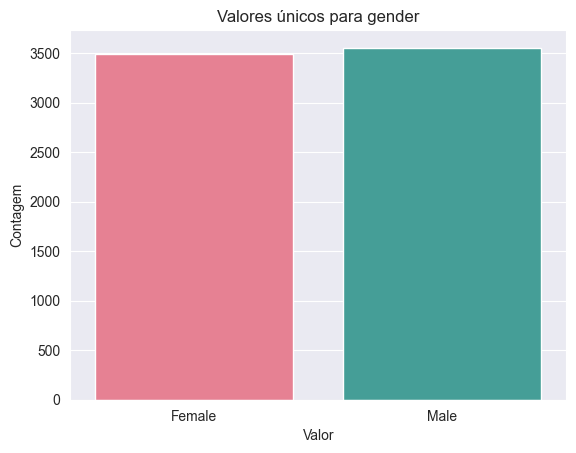

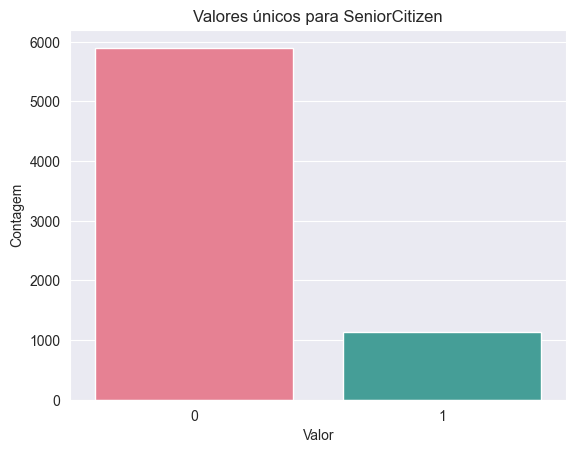

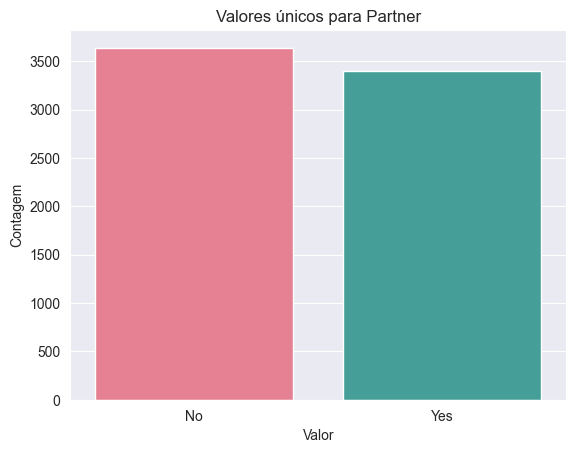

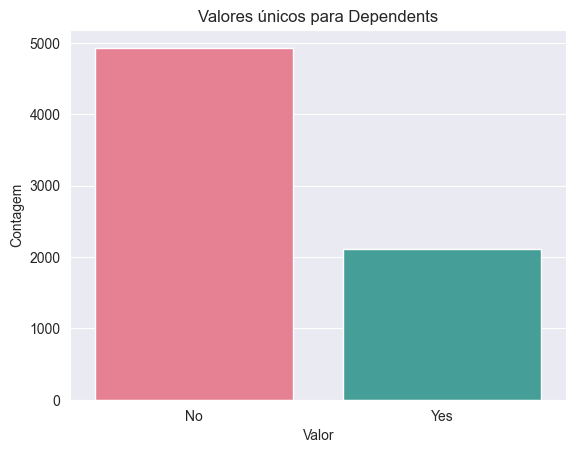

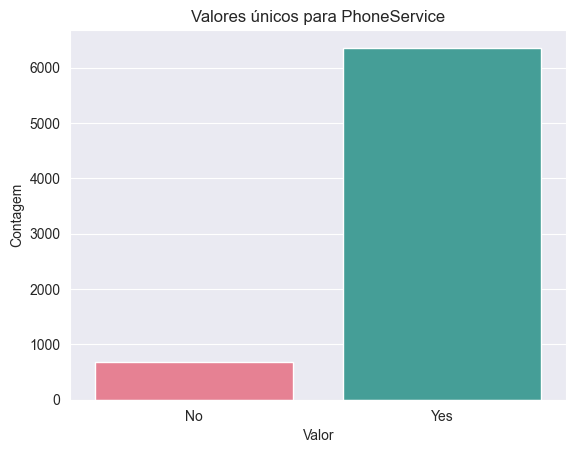

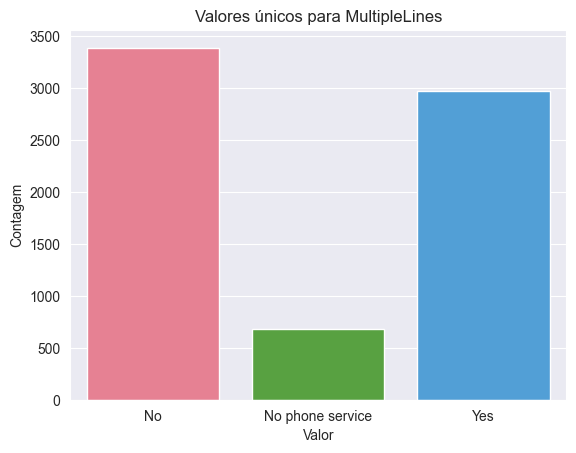

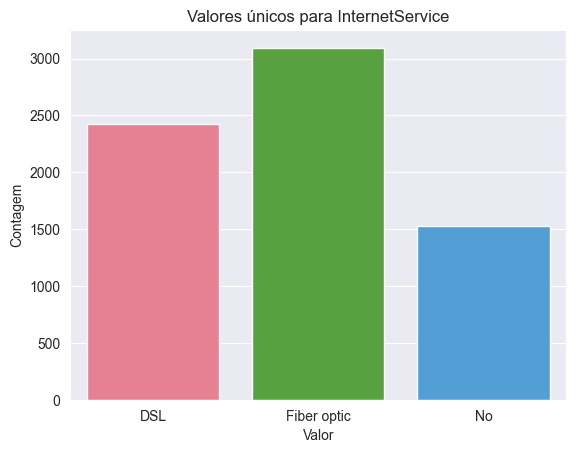

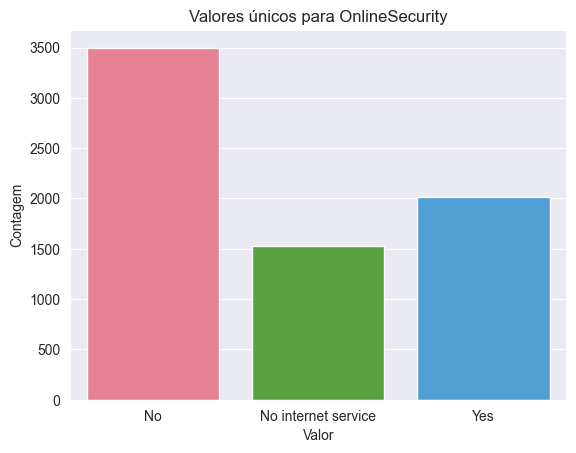

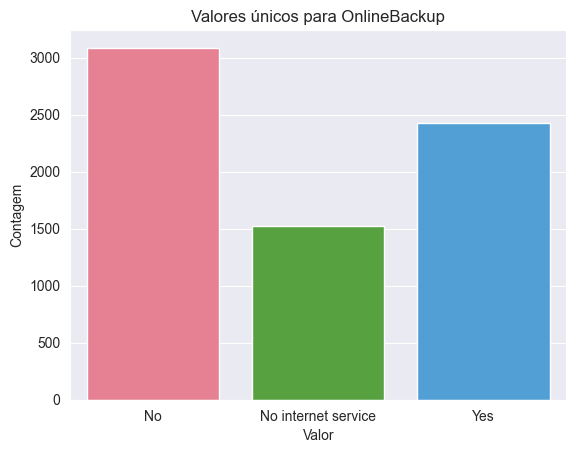

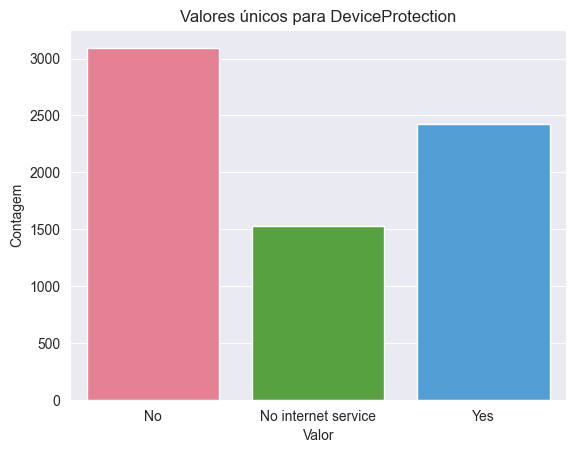

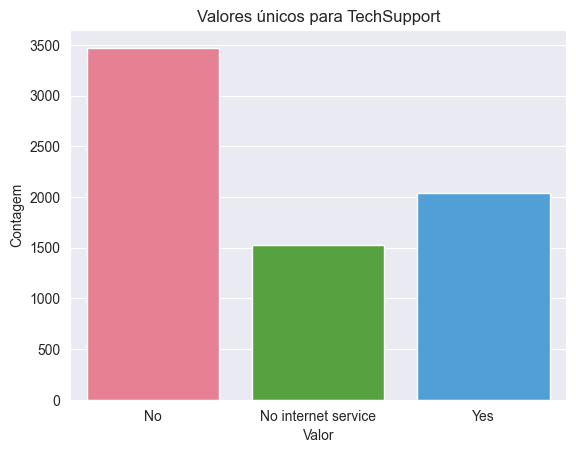

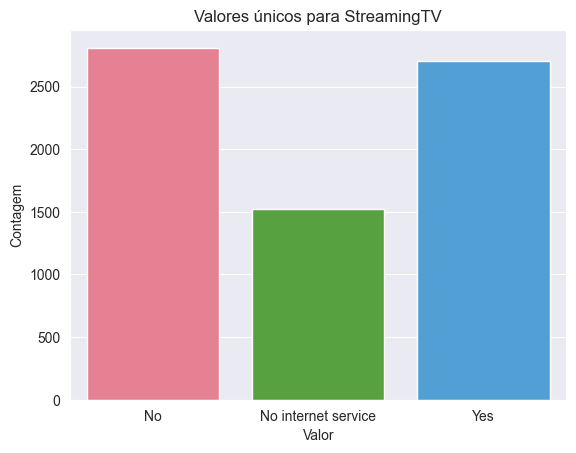

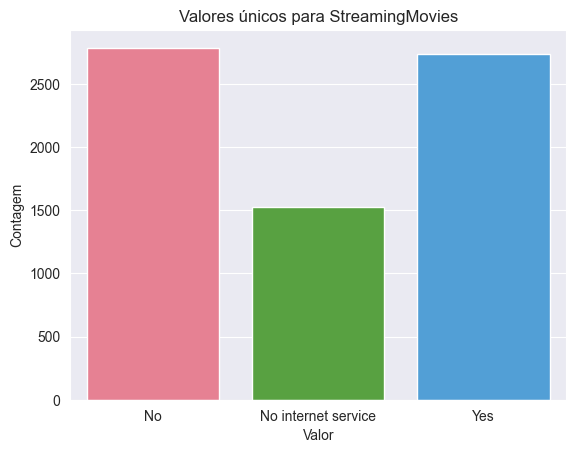

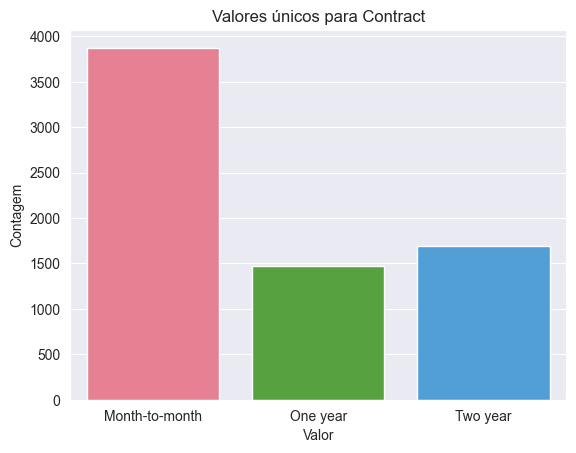

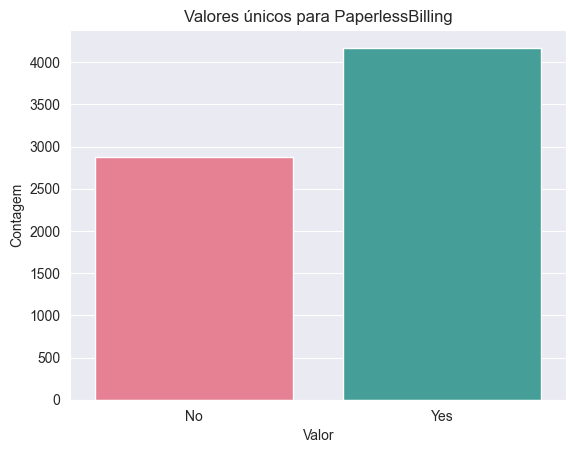

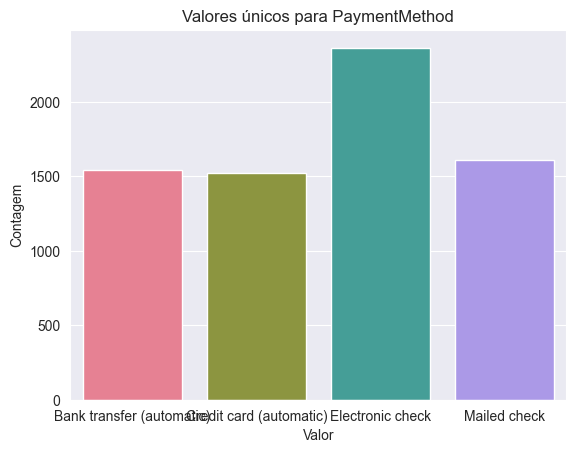

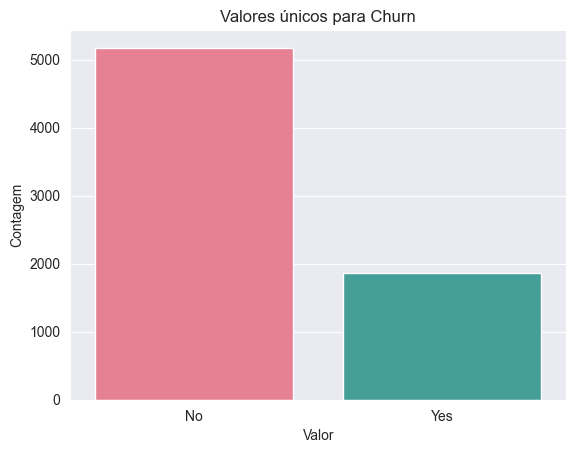

In [269]:
#verificando os valores únicos das variáveis categóricas em formato gráfico com matplotlib  
    
%matplotlib inline

for col in categorical_columns:
    plt.figure()
    sns.countplot(data=df, x=col, palette='husl')
    plt.title(f'Valores únicos para {col}')
    plt.xlabel('Valor')
    plt.ylabel('Contagem')
    plt.show()

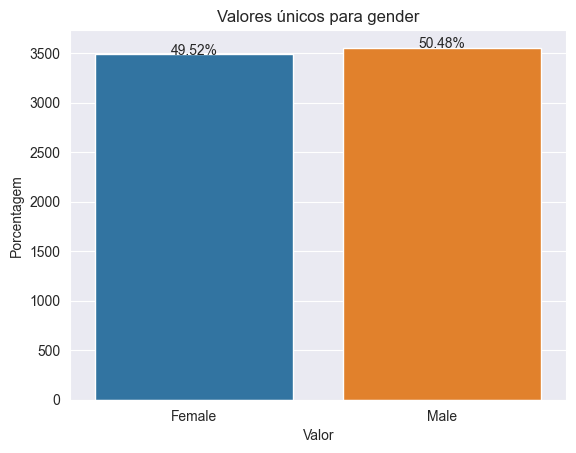

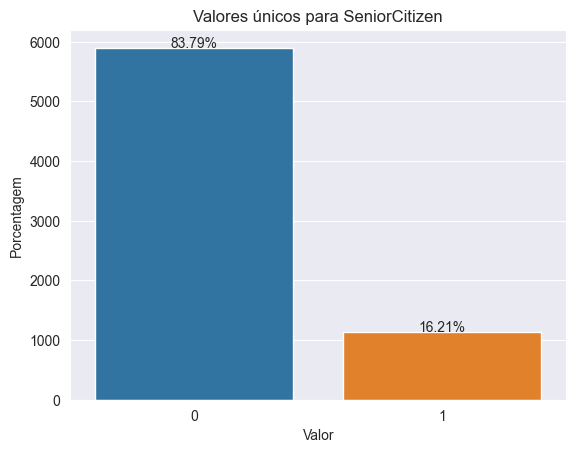

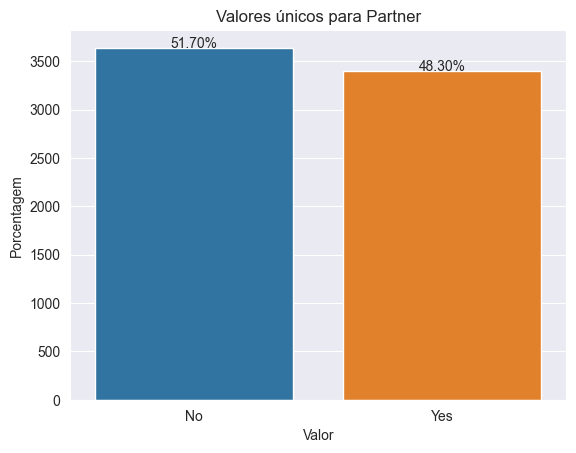

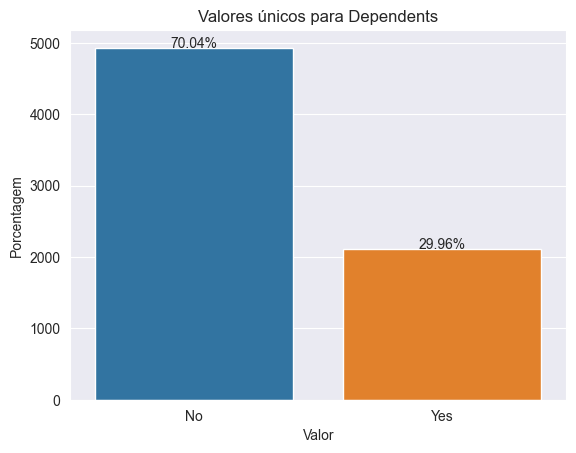

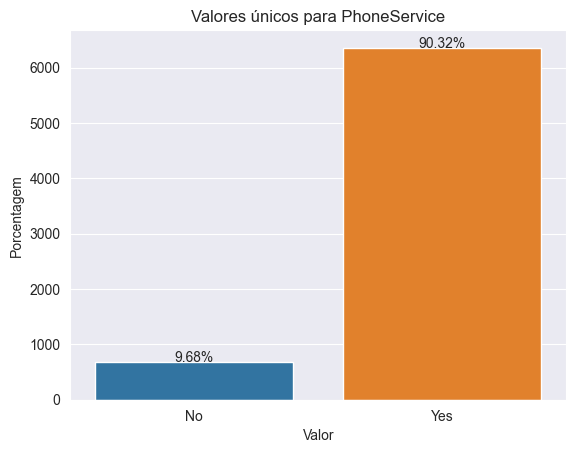

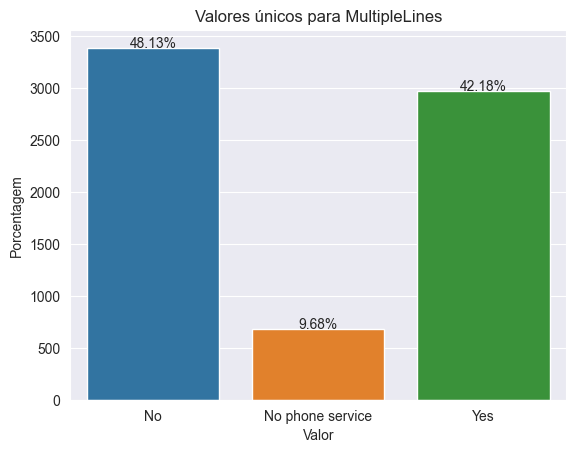

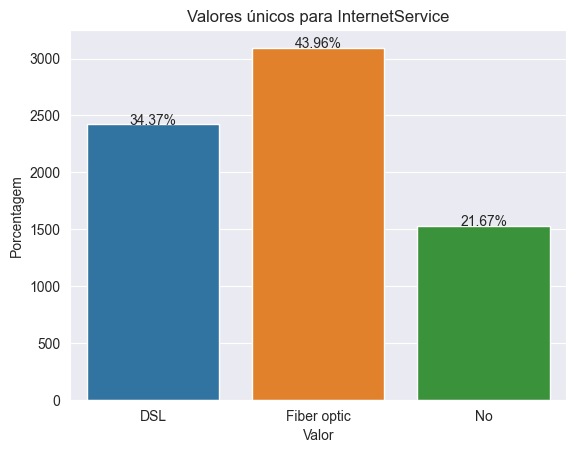

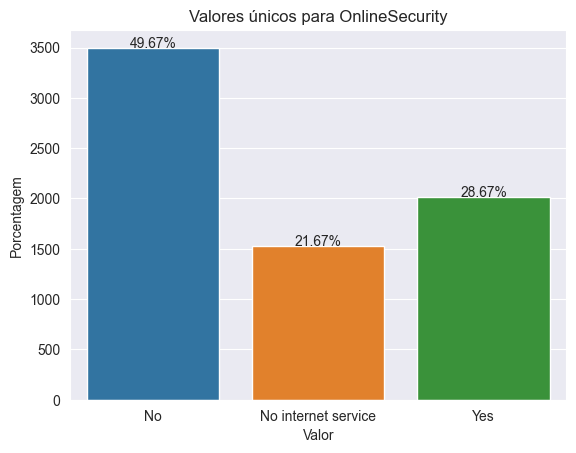

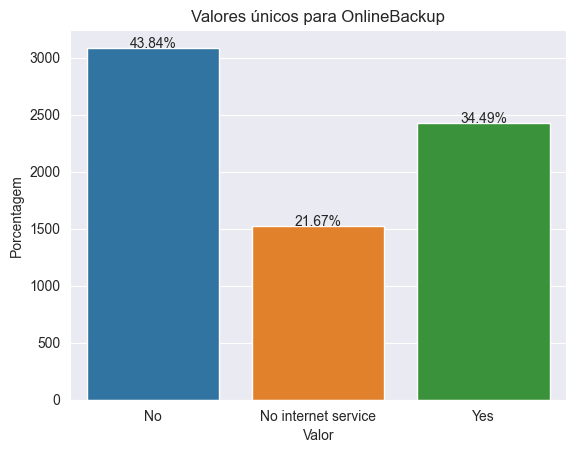

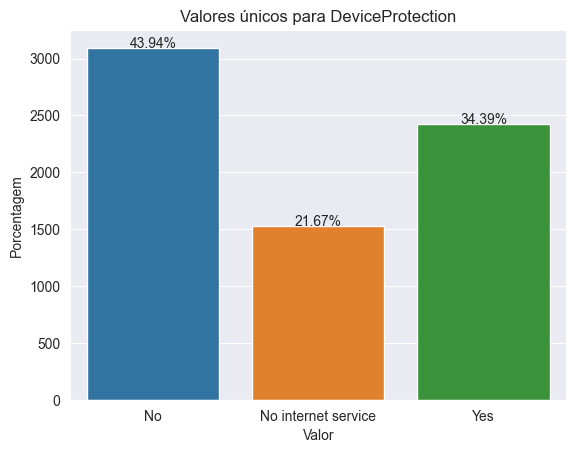

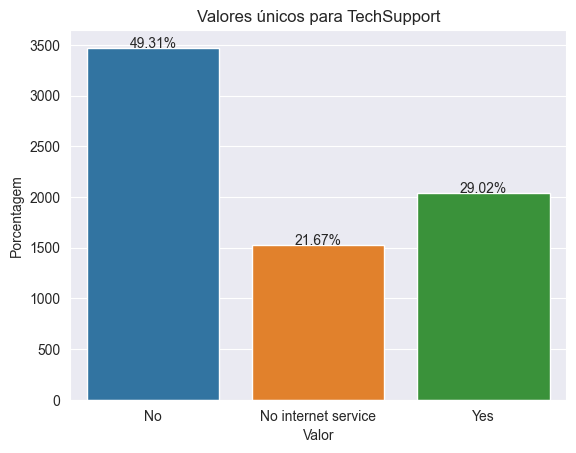

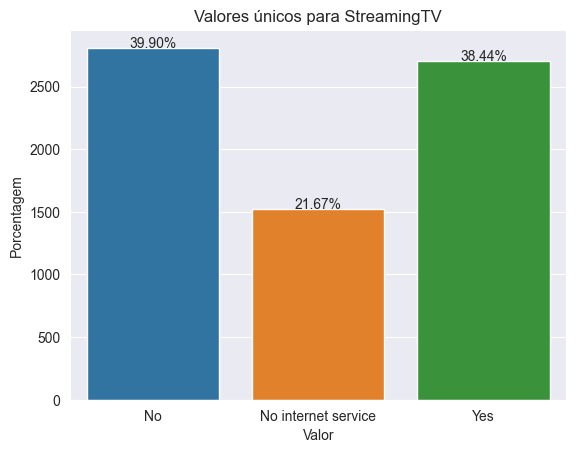

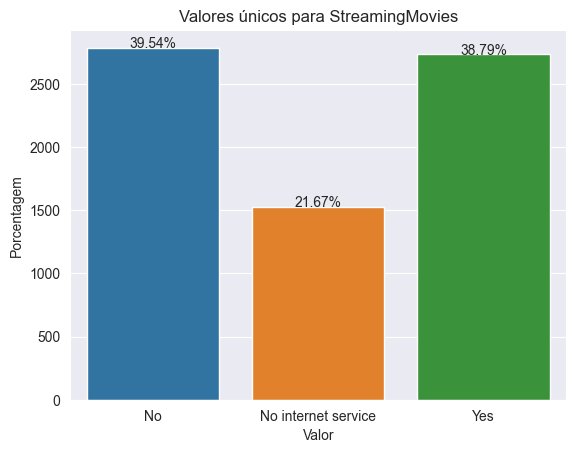

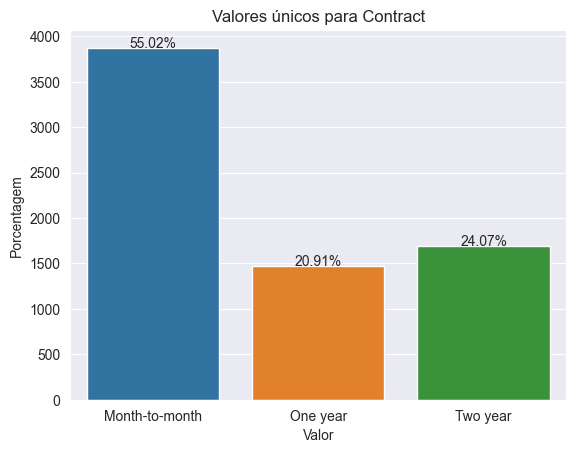

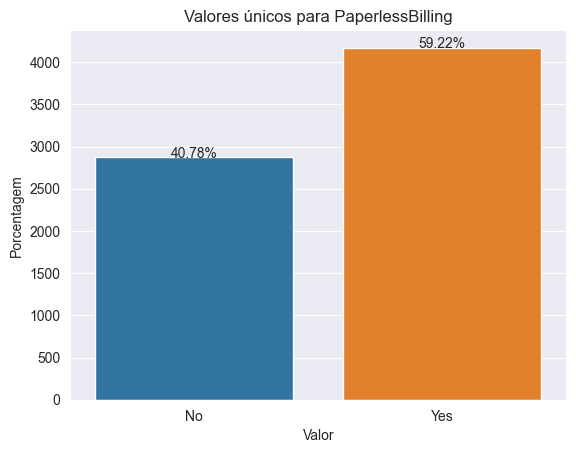

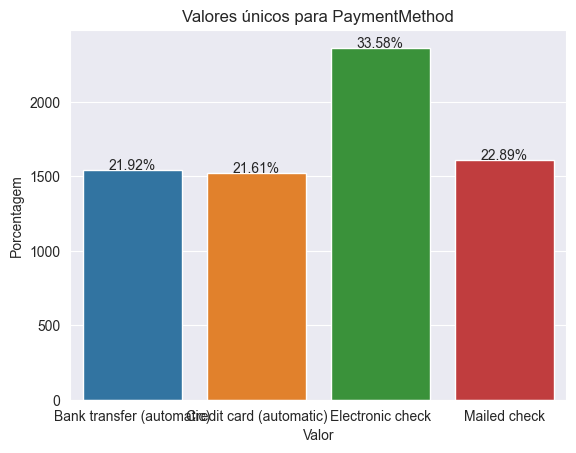

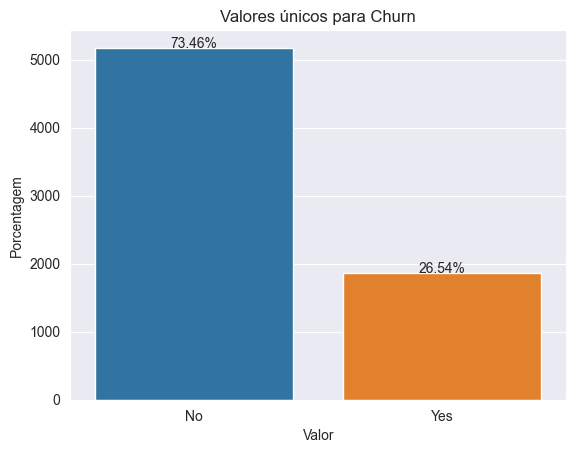

In [270]:
#verificando os valores únicos das variáveis categóricas em formato gráfico com seaborn - em porcentagem
for col in categorical_columns:
    plt.figure()
    total_entries = len(df[col])
    ax = sns.countplot(data=df, x=col)
    plt.title(f'Valores únicos para {col}')
    plt.xlabel('Valor')
    plt.ylabel('Porcentagem')
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 0.5,
                '{:.2f}%'.format((height / total_entries) * 100),
                ha="center")
    
    plt.show()

In [271]:
#insigths
#A coluna 'gender' tem praticamente a mesma quantidade entre os gêneros
#A maioria das pessoas não é senior 
#Um pouco a mais da metade das pessoas não tem parceiro
#A maioria não tem dependentes
#Quase todos tem Serviço de telefone
#Um pouco mais da metade não tem mais de um serivço de telefone
#Na faixa de 40% tem internet via fibra, 30% com DSL e 20% sem serviço de internet
#Metade não tem serviço de segurança aproximadamente 30% tem e 20% não tem serviço de intenet
#43% não tem backup 35% tem backup e 20% não tem serviço de internet
# Na faixa de 44% não tem seriço de proteção de equipamentos, 35% tem e 20% sem serviço de internet
#Metade não tem serviço de suporte, aproximadamente 30% tem e 20% não tem serviço de internet 
#Aproximadamente 40% tem streaming de TV, 40% não tem e 20% não tem serviço de internet 
#Aproximadamente 40% tem streaming de filmes, 40% não tem e 20% não tem serviço de internet
#55% tem contrato mensal, 24% contrato de 2 anos e 12% tem contrato anual 
#59% fatura sem papel e 41% fatura em papel 
#33% pagamento em cheque eletrônico, 23% cheque enviado pelo correio, 22% transferência bancária (automática) e 22% cartão de crédito (automático)'PaymentMethod', 
#73% não cancelou os serviços e 27% cancelou os serviços

### Exclusão de colunas que não ajudarão na modelagem de ML

In [272]:
# Antes de avançarmos, vamos verificar se há colunas que não nos ajudarão no modelo ML e excluí-las do dataset

In [273]:
df_balanceado.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
657,1775-KWJKQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.85,6562.90,No
829,8380-MQINP,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.30,1079.05,No
728,8336-TAVKX,Female,1,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),78.45,5682.25,No
3113,5729-KLZAR,Female,0,Yes,Yes,4,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,80.85,302.75,Yes
3671,3005-NFMTA,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.80,5617.75,Yes


In [274]:
# Colunas a serem excluídas: 
# ID do cliente não traz informação relevante
# As colunas tenure e TotalCharges tem alta correlação positiva. Decidi excluir a TotalCharges para evitar problemas na modelagem.
colunas_a_excluir = ['customerID', 'TotalCharges']

# Excluir colunas
df_balanceado_2 = df_balanceado.drop(columns=colunas_a_excluir)


#print("DataFrame após excluir as colunas:")
df_balanceado_2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
2800,Male,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,50.75,Yes
2671,Male,1,No,No,23,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,Yes
2453,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,Yes
2629,Male,0,Yes,No,20,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.00,Yes
3179,Female,0,No,No,18,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.05,Yes


In [275]:
df_balanceado_2.shape

(3738, 19)

### Tratamento das variáveis categóricas para utilizá-las em ML

In [276]:
# Obtendo os nomes das colunas categóricas
df_balanceado_3 = df_balanceado_2.copy()
#excluir a variável target
df_balanceado_3 = df_balanceado_3.drop(columns=['Churn'])
nomes_colunas = df_balanceado_3.select_dtypes(include=['category']).columns
print(nomes_colunas)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [277]:
df_cat = df_balanceado_3[nomes_colunas]

In [278]:
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
2,Male,1,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [279]:
# Sendo que cada variável categórica tem poucos tipos de valores, escolhi o OneHotEncoder para tratar as variáveis categóricas 
# Converte nomes_colunas de objeto tipo Índice (Index) para objeto tipo lista (list)
nomes_colunas_list = nomes_colunas.tolist()

# Inicializa o OneHotEncoder com os nomes das colunas categóricas
enc = OneHotEncoder(cols=nomes_colunas_list, use_cat_names=True)

# Aplica o OneHotEncoder para as colunas categóricas do DataFrame
df_encoded = enc.fit_transform(df_cat)

In [280]:
df_encoded.head()

,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic)
0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,0,1,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,0,1,0,1,1,0,0,1,1,0,...,0,1,0,0,0,1,1,0,0,0
3,0,1,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [281]:
# Obtem os tipos de dados das colunas
tipos_de_dados = df_balanceado_2.dtypes

# Seleciona apenas as colunas que não são do tipo 'object' (categóricas)
colunas_nao_categoricas = tipos_de_dados[tipos_de_dados != 'category'].index.tolist()

print("Colunas não categóricas:", colunas_nao_categoricas)

Colunas não categóricas: ['tenure', 'MonthlyCharges']


In [282]:
# dataframe somente com as colunas numéricas
df_num=df_balanceado_2[colunas_nao_categoricas]

In [283]:
#colocando colunas das variáveis não categóricas - juntando novamente as colunas numéricas e categóricas, 
# exceto variável 'Churn'
df1 = pd.concat([df_num, df_encoded], axis=1)

### Tratando a variável alvo 'Churn'

In [284]:
df_balanceado_2['Churn'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [285]:
# Verifique o tipo de dados da coluna 'Churn'
print(df_balanceado_2['Churn'].dtype)

category


In [286]:
# Devem ser corrigidos quaisquer problemas nos dados originais
# Vamos remover espaços em branco extras nos valores
df_balanceado_2['Churn'] = df_balanceado_2['Churn'].str.strip()

In [287]:
#Aplicando diretamente a transformação de Sim (Yes) e Não (No) em números
df_balanceado_2['Churn'] = df_balanceado_2['Churn'].map({'Yes': 1, 'No': 0})

In [288]:
# verificando se foram feitas as alterações
df_balanceado_2['Churn'].unique()

array([0, 1], dtype=int64)

In [289]:
# colocando a coluna 'Churn' ao dataframe
df_para_ML = pd.concat([df1, df_balanceado_2['Churn']], axis=1)

In [290]:
# visualizando parte do dataframe que será utilizado daqui para frente
df_para_ML.sample(10)

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),Churn
56,12,26.40,0,1,1,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,0
3049,17,94.40,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
1448,72,64.80,0,1,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1273,30,83.55,0,1,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
254,29,76.00,1,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1985,1,55.00,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
1654,53,111.80,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
3006,19,78.25,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
311,23,57.75,1,0,1,0,0,1,0,1,...,0,0,1,0,1,1,0,0,0,0
2514,59,93.85,0,1,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,1


### Escolha das variáveis mais relevantes para ML

In [291]:
X = df_para_ML.drop(columns=['Churn'])
y = df_para_ML['Churn']

# Inicializa o modelo RandomForestClassifier
rf_model = RandomForestClassifier()

# Treinamento do modelo
rf_model.fit(X, y)

# Obtem a importância das características
importancias_features = rf_model.feature_importances_

# Cria um DataFrame para visualizar as importâncias das características
df_importancias = pd.DataFrame(importancias_features, index=X.columns, columns=['Importância'])
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

# Visualiza as importâncias das características
print(df_importancias)

                                         Importância
tenure                                      0.166241
MonthlyCharges                              0.152110
Contract_Month-to-month                     0.082274
OnlineSecurity_No                           0.036189
TechSupport_No                              0.035993
Contract_Two year                           0.035109
PaymentMethod_Electronic check              0.032815
InternetService_Fiber optic                 0.027397
gender_Male                                 0.018001
gender_Female                               0.017774
DeviceProtection_No                         0.017098
OnlineBackup_No                             0.017079
Contract_One year                           0.016248
OnlineSecurity_Yes                          0.016009
PaperlessBilling_Yes                        0.015997
Partner_Yes                                 0.015807
Partner_No                                  0.015626
PaperlessBilling_No                         0.

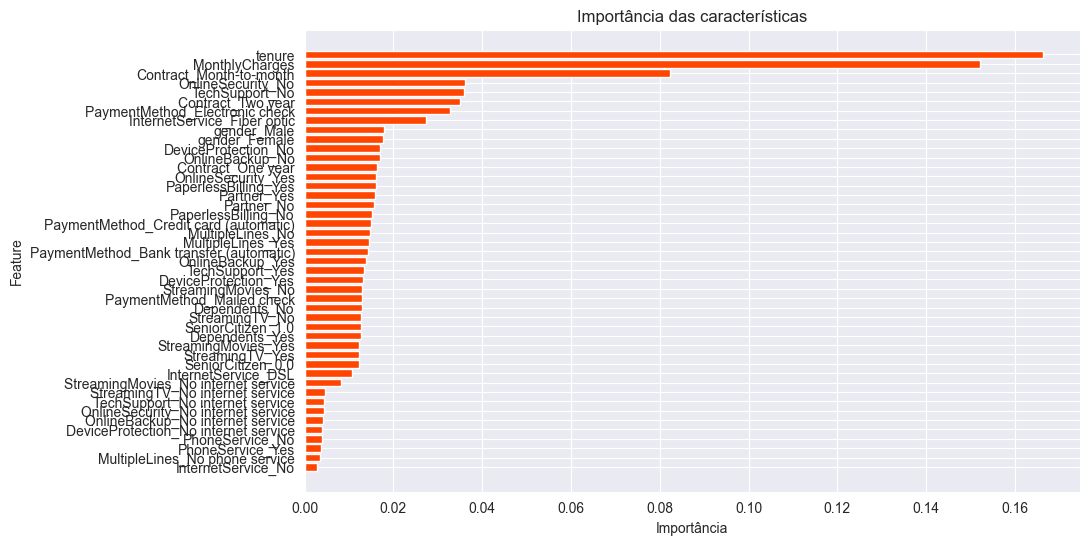

In [292]:
# Plot das importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(df_importancias.index, df_importancias['Importância'], color='orangered')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das características')
plt.gca().invert_yaxis()  # Inverte os eixos para ter a característica mais importante no topo
plt.show()

In [293]:
# decisão: vou escolher as variáveis mais importantes para seguir com modelo ML

In [294]:
# Filtragem no DataFrame para incluir apenas linhas com valores de importância maiores que 0.03
df_importancias_filtrado = df_importancias[df_importancias['Importância'] > 0.03]

# Visualizar o DataFrame filtrado
print(df_importancias_filtrado)

                                Importância
tenure                             0.166241
MonthlyCharges                     0.152110
Contract_Month-to-month            0.082274
OnlineSecurity_No                  0.036189
TechSupport_No                     0.035993
Contract_Two year                  0.035109
PaymentMethod_Electronic check     0.032815


In [295]:
# Obtem os nomes das colunas do DataFrame filtrado
nomes_colunas_filtradas = df_importancias_filtrado.index.tolist()

# Visualiza uma lista com os nomes das colunas
print(nomes_colunas_filtradas)

['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'OnlineSecurity_No', 'TechSupport_No', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [296]:
# Vamos criar o dataframe final para o ML juntando as colunas mais importantes e a variável alvo 'Churn'
colunas_selecionadas = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month','Contract_Two year','InternetService_Fiber optic',
'PaymentMethod_Electronic check', 'TechSupport_No', 'OnlineSecurity_No','Churn']
# Selecionando apenas as três colunas pelo nome
df_final= df_para_ML[colunas_selecionadas]
df_final.sample(10)

,tenure,MonthlyCharges,Contract_Month-to-month,Contract_Two year,InternetService_Fiber optic,PaymentMethod_Electronic check,TechSupport_No,OnlineSecurity_No,Churn
3001,24,101.25,1,0,1,1,1,1,1
3528,3,99.00,1,0,1,0,1,0,1
2398,5,47.15,1,0,0,1,1,1,1
2722,1,81.70,1,0,1,1,1,0,1
1268,28,80.60,1,0,1,1,1,1,0
2846,16,89.05,1,0,1,0,0,1,1
1391,10,75.05,1,0,1,1,1,1,0
2977,11,73.50,1,0,1,1,1,0,1
3052,11,99.55,1,0,1,1,1,1,1
530,37,95.25,1,0,1,1,1,1,0


In [297]:
df_final.shape

(3738, 9)

# 8 - Construção, Treinamento e Avaliação do Modelo 1 com Regressão Logística (Benchmark)


In [298]:
# Preparando os dados de treino e teste
X = df_final.drop(columns=['Churn'])
y = df_final['Churn']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

### Padronização dos dados

In [299]:
scaler = StandardScaler()

In [300]:
scaler.fit(X_treino)

StandardScaler()

In [301]:
X_treino = scaler.transform(X_treino)

In [302]:
X_teste = scaler.transform(X_teste)

In [303]:
X_treino[:5]

array([[ 0.80317465,  0.59171203,  0.72492083, -0.46309803,  0.95486371,
        -0.8204848 ,  0.86105135,  0.84176685],
       [-1.10953665, -1.51111157,  0.72492083, -0.46309803, -1.04726988,
         1.21879163,  0.86105135,  0.84176685],
       [-1.06795597,  0.44423677,  0.72492083, -0.46309803,  0.95486371,
         1.21879163,  0.86105135,  0.84176685],
       [ 0.38736784, -1.67767185, -1.37946099, -0.46309803, -1.04726988,
         1.21879163, -1.16137092, -1.18797741],
       [-0.27792304,  1.20243307,  0.72492083, -0.46309803,  0.95486371,
         1.21879163, -1.16137092,  0.84176685]])

In [304]:
X_teste[:5]

array([[ 1.21898145,  0.21348138,  0.72492083, -0.46309803,  0.95486371,
         1.21879163,  0.86105135,  0.84176685],
       [-0.94321393, -0.99408068,  0.72492083, -0.46309803, -1.04726988,
         1.21879163,  0.86105135,  0.84176685],
       [-1.06795597, -1.67593685,  0.72492083, -0.46309803, -1.04726988,
        -0.8204848 , -1.16137092, -1.18797741],
       [ 0.30420648, -1.52672659,  0.72492083, -0.46309803, -1.04726988,
         1.21879163,  0.86105135,  0.84176685],
       [-0.81847189, -1.65511681,  0.72492083, -0.46309803, -1.04726988,
        -0.8204848 , -1.16137092, -1.18797741]])

## 8.1 - Modelo de Regressão Logística

In [305]:
# Cria o modelo
modelo_v1 = LogisticRegression()
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)
# Matriz de confusão do Modelo
Previsao = modelo_v1.predict(X_teste)
print('Matriz Confusão: \n', confusion_matrix(y_teste, Previsao), '\n')

Matriz Confusão: 
 [[304  95]
 [ 65 284]] 



In [306]:
# Métricas de Classificação - Relatório de Classificação
print('Relatório de Classificação - Regressão Logistica: \n', classification_report(y_teste, Previsao))

Relatório de Classificação - Regressão Logistica: 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79       399
           1       0.75      0.81      0.78       349

    accuracy                           0.79       748
   macro avg       0.79      0.79      0.79       748
weighted avg       0.79      0.79      0.79       748



In [307]:
# Acurácia do modelo de Regressão Logística 
print('Score (Treino): ', round(modelo_v1.score(X_treino, y_treino), 2))
print('Score (Teste): ', round(modelo_v1.score(X_teste, y_teste), 2))

Score (Treino):  0.76
Score (Teste):  0.79


In [308]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v1.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v1 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)
# Extraindo cada valor da Confusion Matrix
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
# Métricas Precision, Recall e f1 score
precision_1 = precision_score(y_teste, y_pred)
recall_1 = recall_score(y_teste, y_pred)
f1_1 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred)

In [309]:
print("True Negative:", tn_1)
print("False Positive:", fp_1)
print("False Negative:", fn_1)
print("True Positive:", tp_1)
print("Accuracy:", accuracy_v1)
print("Area Under the Curve:", auc_v1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1 score:", f1_1)
print("ROC_AUC:", roc_auc_v1)

True Negative: 304
False Positive: 95
False Negative: 65
True Positive: 284
Accuracy: 0.786096256684492
Area Under the Curve: 0.868956057766192
Precision: 0.7493403693931399
Recall: 0.8137535816618912
F1 score: 0.7802197802197803
ROC_AUC: 0.7878291717833266


## 8.2 - Modelo de Random Forest

In [310]:
# Cria o modelo
modelo_v2 = RandomForestClassifier(max_depth=3)
# Treinamento do modelo
modelo_v2.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_forest = modelo_v2.predict(X_teste)
print('Relatório de Classificação - Random Forest: \n', classification_report(y_teste, Previsao_forest))

Relatório de Classificação - Random Forest: 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       399
           1       0.75      0.83      0.79       349

    accuracy                           0.79       748
   macro avg       0.80      0.80      0.79       748
weighted avg       0.80      0.79      0.79       748



In [311]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v2.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v2 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)
# Extraindo cada valor da Confusion Matrix
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)
# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)
# Métricas Precision, Recall e f1 score
precision_2 = precision_score(y_teste, y_pred)
recall_2 = recall_score(y_teste, y_pred)
f1_2 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred)

In [312]:
print("True Negative:", tn_2)
print("False Positive:", fp_2)
print("False Negative:", fn_2)
print("True Positive:", tp_2)
print("Accuracy:", accuracy_v2)
print("Area Under the Curve:", auc_v2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1 score:", f1_2)
print("ROC_AUC:", roc_auc_v2)

True Negative: 303
False Positive: 96
False Negative: 58
True Positive: 291
Accuracy: 0.7941176470588235
Area Under the Curve: 0.8746759448765178
Precision: 0.751937984496124
Recall: 0.833810888252149
F1 score: 0.7907608695652175
ROC_AUC: 0.7966046922463752


## 8.3 - Modelo de SVM

In [313]:
# Cria o modelo
modelo_v3 = SVC(kernel='linear', probability=True)
# Treinamento do modelo
modelo_v3.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_svm = modelo_v3.predict(X_teste)
print('Relatório de Classificação - SVM: \n', classification_report(y_teste, Previsao_svm))

Relatório de Classificação - SVM: 
               precision    recall  f1-score   support

           0       0.88      0.63      0.74       399
           1       0.68      0.90      0.78       349

    accuracy                           0.76       748
   macro avg       0.78      0.77      0.76       748
weighted avg       0.79      0.76      0.76       748



In [314]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v3.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v3 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)
# Extraindo cada valor da Confusion Matrix
tn_3, fp_3, fn_3, tp_3 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)
# AUC em teste
auc_v3 = auc(fpr_v3, tpr_v3)
# Métricas Precision, Recall e f1 score
precision_3 = precision_score(y_teste, y_pred)
recall_3 = recall_score(y_teste, y_pred)
f1_3 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v3 = roc_auc_score(y_teste, y_pred)

In [315]:
print("True Negative:", tn_3)
print("False Positive:", fp_3)
print("False Negative:", fn_3)
print("True Positive:", tp_3)
print("Accuracy:", accuracy_v3)
print("Area Under the Curve:", auc_v3)
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1 score:", f1_3)
print("ROC_AUC:", roc_auc_v3)

True Negative: 253
False Positive: 146
False Negative: 34
True Positive: 315
Accuracy: 0.7593582887700535
Area Under the Curve: 0.8727549532857933
Precision: 0.6832971800433839
Recall: 0.9025787965616046
F1 score: 0.7777777777777777
ROC_AUC: 0.768332004797093


## 8.4 - Modelo de Rede Neural

In [316]:
# Criar o modelo
modelo_v4 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
# Treinamento do modelo
modelo_v4.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_rn = modelo_v4.predict(X_teste)
print('Relatório de Classificação - Rede Neural: \n', classification_report(y_teste, Previsao_rn))

Relatório de Classificação - Rede Neural: 
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       399
           1       0.73      0.85      0.78       349

    accuracy                           0.78       748
   macro avg       0.79      0.79      0.78       748
weighted avg       0.79      0.78      0.78       748



In [317]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v4.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v4 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)
# Extraindo cada valor da CM
tn_4, fp_4, fn_4, tp_4 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)
# AUC em teste
auc_v4 = auc(fpr_v4, tpr_v4)
# Métricas Precision, Recall e f1 score
precision_4 = precision_score(y_teste, y_pred)
recall_4 = recall_score(y_teste, y_pred)
f1_4 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v4 = roc_auc_score(y_teste, y_pred)

In [318]:
print("True Negative:", tn_4)
print("False Positive:", fp_4)
print("False Negative:", fn_4)
print("True Positive:", tp_4)
print("Accuracy:", accuracy_v4)
print("Area Under the Curve:", auc_v4)
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1 score:", f1_4)
print("ROC_AUC:", roc_auc_v4)

True Negative: 286
False Positive: 113
False Negative: 51
True Positive: 298
Accuracy: 0.7807486631016043
Area Under the Curve: 0.8638070821753524
Precision: 0.7250608272506083
Recall: 0.8538681948424068
F1 score: 0.7842105263157895
ROC_AUC: 0.7853300873961409


## 8.5 - Modelo de XGBOOST

In [319]:
# Criar o modelo
modelo_v5 = XGBClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3, random_state=42)
# Treinamento do modelo
modelo_v5.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_xgboost = modelo_v5.predict(X_teste)
print('Relatório de Classificação - XGBOOST: \n', classification_report(y_teste, Previsao_xgboost))

Relatório de Classificação - XGBOOST: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       399
           1       0.74      0.84      0.79       349

    accuracy                           0.79       748
   macro avg       0.79      0.79      0.79       748
weighted avg       0.80      0.79      0.79       748



In [320]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v5.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v5 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)
# Extraindo cada valor da CM
tn_5, fp_5, fn_5, tp_5 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)
# AUC em teste
auc_v5 = auc(fpr_v5, tpr_v5)
# Métricas Precision, Recall e f1 score
precision_5 = precision_score(y_teste, y_pred)
recall_5 = recall_score(y_teste, y_pred)
f1_5 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v5 = roc_auc_score(y_teste, y_pred)

In [321]:
print("True Negative:", tn_5)
print("False Positive:", fp_5)
print("False Negative:", fn_5)
print("True Positive:", tp_5)
print("Accuracy:", accuracy_v5)
print("Area Under the Curve:", auc_v5)
print("Precision:", precision_5)
print("Recall:", recall_5)
print("F1 score:", f1_5)
print("ROC_AUC:", roc_auc_v5)

True Negative: 296
False Positive: 103
False Negative: 55
True Positive: 294
Accuracy: 0.7887700534759359
Area Under the Curve: 0.8704856697617971
Precision: 0.7405541561712846
Recall: 0.8424068767908309
F1 score: 0.7882037533512064
ROC_AUC: 0.7921307566911548


## 8.6 - Modelo de LIGHTGBM

In [322]:
# Criar o modelo
modelo_v6 = LGBMClassifier(learning_rate=0.01, n_estimators=1000, max_depth=3, random_state=42)
# Treinamento do modelo
modelo_v6.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_lightGBM = modelo_v6.predict(X_teste)
print('Relatório de Classificação - lightGBM: \n', classification_report(y_teste, Previsao_lightGBM))

[LightGBM] [Info] Number of positive: 1520, number of negative: 1470
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 2990, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.508361 -> initscore=0.033448
[LightGBM] [Info] Start training from score 0.033448
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [323]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v6.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v6 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v6 = modelo_v6.predict_proba(X_teste)
# Extraindo cada valor da CM
tn_6, fp_6, fn_6, tp_6 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v6 = modelo_v6.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v6, tpr_v6, thresholds = roc_curve(y_teste, y_pred_proba_v6)
# AUC em teste
auc_v6 = auc(fpr_v6, tpr_v6)
# Métricas Precision, Recall e f1 score
precision_6 = precision_score(y_teste, y_pred)
recall_6 = recall_score(y_teste, y_pred)
f1_6 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v6 = roc_auc_score(y_teste, y_pred)

In [324]:
print("True Negative:", tn_6)
print("False Positive:", fp_6)
print("False Negative:", fn_6)
print("True Positive:", tp_6)
print("Accuracy:", accuracy_v6)
print("Area Under the Curve:", auc_v6)
print("Precision:", precision_6)
print("Recall:", recall_6)
print("F1 score:", f1_6)
print("ROC_AUC:", roc_auc_v6)

True Negative: 293
False Positive: 106
False Negative: 52
True Positive: 297
Accuracy: 0.7887700534759359
Area Under the Curve: 0.8690314611744261
Precision: 0.7369727047146402
Recall: 0.8510028653295129
F1 score: 0.7898936170212767
ROC_AUC: 0.7926693524642552


## 8.7 - Avaliação do melhor algoritmo

In [325]:
# Defina os valores para cada modelo
modelos = ['Regressão Logística', 'Random Forest', 'SVM', 'Rede Neural', 'XGBoost', 'LightGBM']
tn = [tn_1, tn_2, tn_3, tn_4, tn_5, tn_6]
fp = [fp_1, fp_2, fp_3, fp_4, fp_5, fp_6]
fn = [fn_1, fn_2, fn_3, fn_4, fn_5, fn_6]
tp = [tp_1, tp_2, tp_3, tp_4, tp_5, tp_6]
acuracia = [accuracy_v1, accuracy_v2, accuracy_v3, accuracy_v4, accuracy_v5, accuracy_v6]
auc_value = [auc_v1, auc_v2, auc_v3, auc_v4, auc_v5, auc_v6]
precision = [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6] 
recall  = [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6]
f1_score_value  = [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6]
roc_auc = [roc_auc_v1, roc_auc_v2, roc_auc_v3, roc_auc_v4, roc_auc_v5, roc_auc_v6]

# Crie um DataFrame usando Pandas
df_resumo_modelos = pd.DataFrame({
    'Modelo': modelos,
    'TN': tn,
    'FP': fp,
    'FN': fn,
    'TP': tp,
    'Acurácia': acuracia,
    'AUC': auc_value,
    'Precision': precision,
    'Recall':recall,
    'F1_score':f1_score_value,
    'ROC_AUC':roc_auc
})

In [326]:
# Melhores modelos considerando a métrica Acurácia mais importante
df_resumo_modelos_acuracia = df_resumo_modelos.sort_values(by='Acurácia', ascending=False)
# fazemos o índice começar em zero
df_resumo_modelos_acuracia =df_resumo_modelos_acuracia.reset_index(drop=True)
# para ordenar os modelos começando do 1, acrescentamos 1 ao indice
df_resumo_modelos_acuracia.index += 1  
print("                    Avaliação do modelos com base na acurácia\n")
df_resumo_modelos_acuracia

                    Avaliação do modelos com base na acurácia



,Modelo,TN,FP,FN,TP,Acurácia,AUC,Precision,Recall,F1_score,ROC_AUC
1,Random Forest,303,96,58,291,0.794118,0.874676,0.751938,0.833811,0.790761,0.796605
2,XGBoost,296,103,55,294,0.788770,0.870486,0.740554,0.842407,0.788204,0.792131
3,LightGBM,293,106,52,297,0.788770,0.869031,0.736973,0.851003,0.789894,0.792669
4,Regressão Logística,304,95,65,284,0.786096,0.868956,0.749340,0.813754,0.780220,0.787829
5,Rede Neural,286,113,51,298,0.780749,0.863807,0.725061,0.853868,0.784211,0.785330
6,SVM,253,146,34,315,0.759358,0.872755,0.683297,0.902579,0.777778,0.768332


In [327]:
# Melhores modelos considerando a métrica AUC mais importante
df_resumo_modelos_auc = df_resumo_modelos.sort_values(by='AUC', ascending=False)
# fazemos o índice começar em zero
df_resumo_modelos_auc = df_resumo_modelos_auc.reset_index(drop=True)
# para ordenar os modelos começando do 1, acrescentamos 1 ao indice
df_resumo_modelos_auc.index += 1  
print("                              Avaliação do modelos com base no AUC\n")
df_resumo_modelos_auc

                              Avaliação do modelos com base no AUC



,Modelo,TN,FP,FN,TP,Acurácia,AUC,Precision,Recall,F1_score,ROC_AUC
1,Random Forest,303,96,58,291,0.794118,0.874676,0.751938,0.833811,0.790761,0.796605
2,SVM,253,146,34,315,0.759358,0.872755,0.683297,0.902579,0.777778,0.768332
3,XGBoost,296,103,55,294,0.788770,0.870486,0.740554,0.842407,0.788204,0.792131
4,LightGBM,293,106,52,297,0.788770,0.869031,0.736973,0.851003,0.789894,0.792669
5,Regressão Logística,304,95,65,284,0.786096,0.868956,0.749340,0.813754,0.780220,0.787829
6,Rede Neural,286,113,51,298,0.780749,0.863807,0.725061,0.853868,0.784211,0.785330


In [328]:
# Melhores modelos considerando a métrica Recall mais importante
df_resumo_modelos_recall = df_resumo_modelos.sort_values(by='Recall', ascending=False)
# fazemos o índice começar em zero
df_resumo_modelos_recall = df_resumo_modelos_recall.reset_index(drop=True)
# para ordenar os modelos começando do 1, acrescentamos 1 ao indice
df_resumo_modelos_recall.index += 1  
print("                              Avaliação do modelos com base no Recall\n")
df_resumo_modelos_recall

                              Avaliação do modelos com base no Recall



,Modelo,TN,FP,FN,TP,Acurácia,AUC,Precision,Recall,F1_score,ROC_AUC
1,SVM,253,146,34,315,0.759358,0.872755,0.683297,0.902579,0.777778,0.768332
2,Rede Neural,286,113,51,298,0.780749,0.863807,0.725061,0.853868,0.784211,0.785330
3,LightGBM,293,106,52,297,0.788770,0.869031,0.736973,0.851003,0.789894,0.792669
4,XGBoost,296,103,55,294,0.788770,0.870486,0.740554,0.842407,0.788204,0.792131
5,Random Forest,303,96,58,291,0.794118,0.874676,0.751938,0.833811,0.790761,0.796605
6,Regressão Logística,304,95,65,284,0.786096,0.868956,0.749340,0.813754,0.780220,0.787829


In [329]:
# Melhores modelos considerando a métrica Precision mais importante
df_resumo_modelos_precision = df_resumo_modelos.sort_values(by='Precision', ascending=False)
# fazemos o índice começar em zero
df_resumo_modelos_precision = df_resumo_modelos_precision.reset_index(drop=True)
# para ordenar os modelos começando do 1, acrescentamos 1 ao indice
df_resumo_modelos_precision.index += 1  
print("                              Avaliação do modelos com base no Precision\n")
df_resumo_modelos_precision

                              Avaliação do modelos com base no Precision



,Modelo,TN,FP,FN,TP,Acurácia,AUC,Precision,Recall,F1_score,ROC_AUC
1,Random Forest,303,96,58,291,0.794118,0.874676,0.751938,0.833811,0.790761,0.796605
2,Regressão Logística,304,95,65,284,0.786096,0.868956,0.749340,0.813754,0.780220,0.787829
3,XGBoost,296,103,55,294,0.788770,0.870486,0.740554,0.842407,0.788204,0.792131
4,LightGBM,293,106,52,297,0.788770,0.869031,0.736973,0.851003,0.789894,0.792669
5,Rede Neural,286,113,51,298,0.780749,0.863807,0.725061,0.853868,0.784211,0.785330
6,SVM,253,146,34,315,0.759358,0.872755,0.683297,0.902579,0.777778,0.768332


In [330]:
# Melhores modelos considerando a métrica F1 score mais importante
df_resumo_modelos_f1 = df_resumo_modelos.sort_values(by='F1_score', ascending=False)
# fazemos o índice começar em zero
df_resumo_modelos_f1 = df_resumo_modelos_f1.reset_index(drop=True)
# para ordenar os modelos começando do 1, acrescentamos 1 ao indice
df_resumo_modelos_f1.index += 1  
print("                              Avaliação do modelos com base no F1_score\n")
df_resumo_modelos_f1

                              Avaliação do modelos com base no F1_score



,Modelo,TN,FP,FN,TP,Acurácia,AUC,Precision,Recall,F1_score,ROC_AUC
1,Random Forest,303,96,58,291,0.794118,0.874676,0.751938,0.833811,0.790761,0.796605
2,LightGBM,293,106,52,297,0.788770,0.869031,0.736973,0.851003,0.789894,0.792669
3,XGBoost,296,103,55,294,0.788770,0.870486,0.740554,0.842407,0.788204,0.792131
4,Rede Neural,286,113,51,298,0.780749,0.863807,0.725061,0.853868,0.784211,0.785330
5,Regressão Logística,304,95,65,284,0.786096,0.868956,0.749340,0.813754,0.780220,0.787829
6,SVM,253,146,34,315,0.759358,0.872755,0.683297,0.902579,0.777778,0.768332


## Seleção do Modelo

### O melhor modelo é o v2 (Random Forest). Tem melhor acurácia, melhor AUC, melhor Precision e melhor F1 Score.

## 8.8 - Otimização do modelo

### 8.6.1 - Otimização somente com mudança de hiperparâmetro

In [331]:
# Cria o modelo
#modelo_v7 = RandomForestClassifier(max_depth=3)

In [332]:
# Treinamento
#modelo_v2.fit(X_treino, y_treino)

In [333]:
# Avaliação do modelo
#Previsao_forest = modelo_v2.predict(X_teste)
#print('Relatório de Classificação - Random Forest: \n', classification_report(y_teste, Previsao_forest))

In [334]:
# Fazer previsões no conjunto de teste
#y_pred = modelo_v2.predict(X_teste)

In [335]:
# Avaliar a precisão do modelo
#accuracy_v2 = accuracy_score(y_teste, y_pred)
#print("Accuracy:", accuracy_v2)

In [336]:
# Defina os hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicialize o modelo RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Inicialize GridSearchCV com o modelo e os hiperparâmetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajuste GridSearchCV aos dados de treinamento
grid_search.fit(X_treino, y_treino)

# Obtenha os melhores hiperparâmetros encontrados
melhores_hiperparametros = grid_search.best_params_

# Use o modelo com os melhores hiperparâmetros para prever os dados de teste
y_pred = grid_search.predict(X_teste)

# Avalie a precisão do modelo nos dados de teste
precisao = accuracy_score(y_teste, y_pred)
print("Precisão do modelo:", precisao)

Precisão do modelo: 0.7927807486631016


In [337]:
# Visualize os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(melhores_hiperparametros)

Melhores hiperparâmetros encontrados:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [338]:
# Cria o modelo
modelo_v7 = RandomForestClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=50)
# Treinamento do modelo
modelo_v7.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_forest = modelo_v7.predict(X_teste)
print('Relatório de Classificação - Random Forest: \n', classification_report(y_teste, Previsao_forest))

Relatório de Classificação - Random Forest: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       399
           1       0.76      0.84      0.80       349

    accuracy                           0.80       748
   macro avg       0.80      0.80      0.80       748
weighted avg       0.81      0.80      0.80       748



In [339]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v7.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v7 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v7 = modelo_v7.predict_proba(X_teste)
# Extraindo cada valor da Confusion Matrix
tn_7, fp_7, fn_7, tp_7 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v7 = modelo_v7.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v7, tpr_v7, thresholds = roc_curve(y_teste, y_pred_proba_v7)
# AUC em teste
auc_v7 = auc(fpr_v7, tpr_v7)
# Métricas Precision, Recall e f1 score
precision_7 = precision_score(y_teste, y_pred)
recall_7 = recall_score(y_teste, y_pred)
f1_7 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v7 = roc_auc_score(y_teste, y_pred)

In [340]:
print("True Negative:", tn_7)
print("False Positive:", fp_7)
print("False Negative:", fn_7)
print("True Positive:", tp_7)
print("Accuracy:", accuracy_v7)
print("Area Under the Curve:", auc_v7)
print("Precision:", precision_7)
print("Recall:", recall_7)
print("F1 score:", f1_7)
print("ROC_AUC:", roc_auc_v7)

True Negative: 305
False Positive: 94
False Negative: 55
True Positive: 294
Accuracy: 0.8008021390374331
Area Under the Curve: 0.875530516836504
Precision: 0.7577319587628866
Recall: 0.8424068767908309
F1 score: 0.7978290366350067
ROC_AUC: 0.8034089521798766


In [341]:
df_resumo_modelos_f1.iloc[0]

Modelo       Random Forest
TN                     303
FP                      96
FN                      58
TP                     291
Acurácia          0.794118
AUC               0.874676
Precision         0.751938
Recall            0.833811
F1_score          0.790761
ROC_AUC           0.796605
Name: 1, dtype: object

In [342]:
# Houve leve melhora com a otimização de hiperparâmetros

In [343]:
# vamos verificar com cross validation como está o desempenho do modelo como um todo

In [344]:
# Realize a validação cruzada com 5 folds
scores = cross_val_score(modelo_v7, X, y, cv=5)

# Exiba os resultados da validação cruzada
print("Acurácia média: {:.2f}".format(scores.mean()))
print("Desvio padrão dos scores: {:.2f}".format(scores.std()))

Acurácia média: 0.76
Desvio padrão dos scores: 0.02


### 8.6.2 - Alterando quantidade de variáveis preditoras

In [345]:
#X_treino, X_teste, y_treino, y_teste 'tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'TechSupport_No', 'Contract_Two year', 'OnlineSecurity_No', 'PaymentMethod_Electronic check'

In [346]:
#colunas_selecionadas = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month','Contract_Two year','InternetService_Fiber optic',
#'PaymentMethod_Electronic check', 'TechSupport_No', 'OnlineSecurity_No','Churn']
colunas_selecionadas4 = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month','Contract_Two year',
                         'InternetService_Fiber optic','PaymentMethod_Electronic check', 'TechSupport_No','Churn']
df_final2= df_para_ML[colunas_selecionadas4]
#df_final2.sample(10)

In [347]:
# Preparando os dados de treino e teste
X = df_final2.drop(columns=['Churn'])
y = df_final2['Churn']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)

In [348]:
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

In [349]:
# Cria o modelo
modelo_v8 = RandomForestClassifier(max_depth=3)
# Treinamento
modelo_v8.fit(X_treino, y_treino)
# Avaliação do modelo
Previsao_forest = modelo_v8.predict(X_teste)
print('Relatório de Classificação - Random Forest: \n', classification_report(y_teste, Previsao_forest))

Relatório de Classificação - Random Forest: 
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       399
           1       0.73      0.89      0.80       349

    accuracy                           0.80       748
   macro avg       0.81      0.80      0.80       748
weighted avg       0.81      0.80      0.80       748



In [350]:
# Fazendo previsões no conjunto de teste
y_pred = modelo_v8.predict(X_teste)
# Avaliando a precisão do modelo
accuracy_v8 = accuracy_score(y_teste, y_pred)
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v8 = modelo_v8.predict_proba(X_teste)
# Extraindo cada valor da CM
tn_8, fp_8, fn_8, tp_8 = confusion_matrix(y_teste, y_pred).ravel()
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba_v8 = modelo_v8.predict_proba(X_teste)[:,1]
# Calcula a curva ROC com dados e previsões em teste
fpr_v8, tpr_v8, thresholds = roc_curve(y_teste, y_pred_proba_v8)
# AUC em teste
auc_v8 = auc(fpr_v8, tpr_v8)
# Métricas Precision, Recall e f1 score
precision_8 = precision_score(y_teste, y_pred)
recall_8 = recall_score(y_teste, y_pred)
f1_8 = f1_score(y_teste, y_pred)
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v8 = roc_auc_score(y_teste, y_pred)

In [351]:
print("True Negative:", tn_8)
print("False Positive:", fp_8)
print("False Negative:", fn_8)
print("True Positive:", tp_8)
print("Accuracy:", accuracy_v8)
print("Area Under the Curve:", auc_v8)
print("Precision:", precision_8)
print("Recall:", recall_8)
print("F1 score:", f1_8)
print("ROC_AUC:", roc_auc_v8)

True Negative: 287
False Positive: 112
False Negative: 40
True Positive: 309
Accuracy: 0.7967914438502673
Area Under the Curve: 0.8713869200221184
Precision: 0.7339667458432304
Recall: 0.8853868194842407
F1 score: 0.8025974025974026
ROC_AUC: 0.8023425325491379


In [352]:
# O modelo_v8 é pior que o modelo_v7.

## Conclusão

## O modelo_v7 foi o melhor.

# Fim